In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch

from torchmin import minimize
from torchmin.benchmarks import rosen

/Users/pankajjatav/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


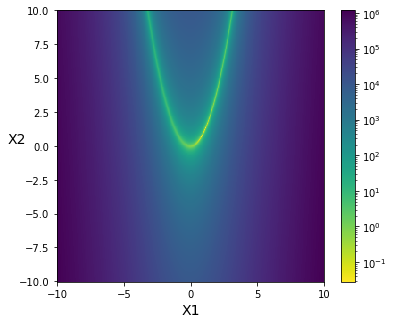

In [2]:
x, y = torch.meshgrid(
    torch.linspace(-10,10,300), 
    torch.linspace(-10,10,300)
)
xy = torch.stack([x, y], -1)
z = rosen(xy, reduce=False)

fig, ax = plt.subplots(figsize=(6,5))
c = ax.pcolormesh(x, y, z, shading='auto', cmap='viridis_r', 
                  norm=LogNorm(vmin=z.min(), vmax=z.max()))
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14, rotation=0)
ax.yaxis.set_label_coords(-0.15, 0.5)
fig.colorbar(c, ax=ax)
plt.show()

In [3]:
x0 = torch.tensor([1., 8.])
rosen(x0)

tensor(4900.)

In [4]:
# BFGS
res_bfgs = minimize(
    rosen, x0, 
    method='bfgs', 
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: {}'.format(res_bfgs.x))

initial fval: 4900.0000
iter   1 - fval: 119.3775
iter   2 - fval: 2.7829
iter   3 - fval: 2.7822
iter   4 - fval: 2.7819
iter   5 - fval: 2.7808
iter   6 - fval: 2.7784
iter   7 - fval: 2.7717
iter   8 - fval: 2.7548
iter   9 - fval: 2.7150
iter  10 - fval: 2.6417
iter  11 - fval: 2.5263
iter  12 - fval: 2.2811
iter  13 - fval: 1.8599
iter  14 - fval: 1.5437
iter  15 - fval: 1.1542
iter  16 - fval: 0.9849
iter  17 - fval: 0.8905
iter  18 - fval: 0.6474
iter  19 - fval: 0.5013
iter  20 - fval: 0.3446
iter  21 - fval: 0.2530
iter  22 - fval: 0.2189
iter  23 - fval: 0.1172
iter  24 - fval: 0.0974
iter  25 - fval: 0.0561
iter  26 - fval: 0.0329
iter  27 - fval: 0.0174
iter  28 - fval: 0.0111
iter  29 - fval: 0.0042
iter  30 - fval: 0.0010
iter  31 - fval: 0.0004
iter  32 - fval: 0.0000
iter  33 - fval: 0.0000
iter  34 - fval: 0.0000
iter  35 - fval: 0.0000
iter  36 - fval: 0.0000
A non-descent direction was encountered.
         Current function value: 0.000000
         Iterations: 37
   

In [5]:
# L BFGS
res_l_bfgs = minimize(
    rosen, x0, 
    method='l-bfgs', 
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: {}'.format(res_l_bfgs.x))

initial fval: 4900.0000
iter   1 - fval: 119.3775
iter   2 - fval: 2.7829
iter   3 - fval: 2.7823
iter   4 - fval: 2.7822
iter   5 - fval: 2.7818
iter   6 - fval: 2.7810
iter   7 - fval: 2.7785
iter   8 - fval: 2.7723
iter   9 - fval: 2.7563
iter  10 - fval: 2.7187
iter  11 - fval: 2.6477
iter  12 - fval: 2.5353
iter  13 - fval: 2.2997
iter  14 - fval: 1.8811
iter  15 - fval: 1.5526
iter  16 - fval: 1.1877
iter  17 - fval: 1.0779
iter  18 - fval: 0.9352
iter  19 - fval: 0.6669
iter  20 - fval: 0.5938
iter  21 - fval: 0.4380
iter  22 - fval: 0.3308
iter  23 - fval: 0.2343
iter  24 - fval: 0.1972
iter  25 - fval: 0.1279
iter  26 - fval: 0.0869
iter  27 - fval: 0.0695
iter  28 - fval: 0.0473
iter  29 - fval: 0.0298
iter  30 - fval: 0.0158
iter  31 - fval: 0.0065
iter  32 - fval: 0.0029
iter  33 - fval: 0.0004
iter  34 - fval: 0.0001
iter  35 - fval: 0.0000
iter  36 - fval: 0.0000
iter  37 - fval: 0.0000
iter  38 - fval: 0.0000
Optimization terminated successfully.
         Current functio

In [6]:
# Newton CG
newton_cg_res = minimize(
    rosen, x0, 
    method='newton-cg',
    options=dict(line_search='strong-wolfe'),
    max_iter=50, 
    disp=2
)
print()
print('final x: {}'.format(newton_cg_res.x))

initial fval: 4900.0000
iter   1 - fval: 6.0505
iter   2 - fval: 2.8156
iter   3 - fval: 2.8144
iter   4 - fval: 2.3266
iter   5 - fval: 2.1088
iter   6 - fval: 1.7060
iter   7 - fval: 1.5851
iter   8 - fval: 1.2548
iter   9 - fval: 1.1625
iter  10 - fval: 0.8967
iter  11 - fval: 0.8249
iter  12 - fval: 0.6160
iter  13 - fval: 0.5591
iter  14 - fval: 0.4051
iter  15 - fval: 0.3299
iter  16 - fval: 0.2217
iter  17 - fval: 0.1886
iter  18 - fval: 0.1167
iter  19 - fval: 0.0987
iter  20 - fval: 0.0543
iter  21 - fval: 0.0442
iter  22 - fval: 0.0210
iter  23 - fval: 0.0118
iter  24 - fval: 0.0035
iter  25 - fval: 0.0021
iter  26 - fval: 0.0005
iter  27 - fval: 0.0000
iter  28 - fval: 0.0000
iter  29 - fval: 0.0000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 29
         Function evaluations: 85
         CG iterations: 41

final x: tensor([1.0000, 1.0000])


In [7]:
# Newton Exact
newton_exact_res = minimize(
    rosen, x0, 
    method='newton-exact',
    options=dict(line_search='strong-wolfe', tikhonov=1e-4),
    max_iter=50, 
    disp=2
)
print()
print('final x: {}'.format(newton_cg_res.x))

initial fval: 4900.0000
iter   1 - fval: 3.3641 - info: 1
iter   2 - fval: 2.8111 - info: 2
iter   3 - fval: 2.3209 - info: 0
iter   4 - fval: 1.7723 - info: 0
iter   5 - fval: 1.4217 - info: 0
iter   6 - fval: 0.9833 - info: 0
iter   7 - fval: 0.7774 - info: 0
iter   8 - fval: 0.5245 - info: 0
iter   9 - fval: 0.3976 - info: 0
iter  10 - fval: 0.2116 - info: 0
iter  11 - fval: 0.1417 - info: 0
iter  12 - fval: 0.0715 - info: 0
iter  13 - fval: 0.0381 - info: 0
iter  14 - fval: 0.0113 - info: 0
iter  15 - fval: 0.0046 - info: 0
iter  16 - fval: 0.0002 - info: 0
iter  17 - fval: 0.0000 - info: 0
iter  18 - fval: 0.0000 - info: 0
iter  19 - fval: 0.0000 - info: 0
iter  20 - fval: 0.0000 - info: 0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 58

final x: tensor([1.0000, 1.0000])
